<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>Datahackerman Final Project</b></font></div>
<div style = "text-align: leftt"><font><i>By 'Moyosade Jacob</i></font></div>
<div style = "text-align: leftt"><font>7th April 2023</font></div>

In [65]:
import pandas as pd
import os
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Main working folder
main_folder = os.getcwd()

In [4]:
# main Data folder 
data_folder = "data"

In [5]:
# Combining the paths
main_path = os.path.join(main_folder, data_folder)

In [6]:
# Getting the data list
files_list = os.listdir(main_path)

In [7]:
files_list

['csv_file.csv', 'json_file.json', 'txt_file.txt']

In [8]:
# Reading csv data file
csv_data = pd.read_csv(os.path.join(main_path, files_list[0]))

In [9]:
csv_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46


In [10]:
# Reading in text data file
text_data = pd.read_csv(os.path.join(main_path, files_list[2]), sep=',', header=0)

In [11]:
text_data.head(1)

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter


In [12]:
# Reading json data file
json_data = pd.read_json(os.path.join(main_path, files_list[1]))

In [13]:
json_data.head()

,author,location,content,properties
0,"{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}","{'longitude': -1.4496120000000001, 'country': 'GB', 'latitude': 53.38322877572023}",{'body': 'To everyone tryin to snapchat me fuck off I'm ugly'},"{'sentiment': -1, 'platform': 'twitter'}"
1,"{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}","{'longitude': -4.200440999999999, 'country': 'GB', 'latitude': 57.786631183916356}",{'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},"{'sentiment': -1, 'platform': 'twitter'}"
2,"{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}","{'longitude': -0.0706035, 'country': 'GB', 'latitude': 51.46469310439313}",{'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3'},"{'sentiment': -1, 'platform': 'twitter'}"
3,"{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}","{'longitude': -0.17311500000000002, 'country': 'GB', 'latitude': 51.5248433429905}",{'body': '😴'},"{'sentiment': 0, 'platform': 'twitter'}"
4,"{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}","{'longitude': -2.6693795, 'country': 'GB', 'latitude': 53.46992093633473}",{'body': '@sickkening Yep you're also that xx'},"{'sentiment': 1, 'platform': 'twitter'}"


### combine the dataFrame

In [14]:
csv_text_data = pd.concat([csv_data, text_data])

In [15]:
len(csv_text_data )

2000

In [16]:
csv_text_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


In [17]:
csv_text_json_data = pd.concat([csv_text_data, json_data])

In [18]:
len(csv_text_json_data)

3000

In [19]:
csv_text_json_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,author,location,content,properties
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46,NaN,NaN,NaN,NaN
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17,NaN,NaN,NaN,NaN
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03,NaN,NaN,NaN,NaN
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80,NaN,NaN,NaN,NaN
4,1617,17922.00,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0.00,53.54,-2.65,NaN,NaN,NaN,NaN


### Data Inspection

In [21]:
csv_text_json_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       2000 non-null   object 
 1   author.properties.status_count  1999 non-null   float64
 2   author.properties.verified      2000 non-null   object 
 3   content.body                    1999 non-null   object 
 4   location.country                1999 non-null   object 
 5   properties.platform             1998 non-null   object 
 6   properties.sentiment            1999 non-null   float64
 7   location.latitude               1999 non-null   float64
 8   location.longitude              1999 non-null   float64
 9   author                          1000 non-null   object 
 10  location                        1000 non-null   object 
 11  content                         1000 non-null   object 
 12  properties                      100

In [27]:
 df = csv_text_json_data[csv_text_json_data["properties.sentiment"].notnull()]

In [30]:
df.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,author,location,content,properties
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46,NaN,NaN,NaN,NaN
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17,NaN,NaN,NaN,NaN
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03,NaN,NaN,NaN,NaN
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80,NaN,NaN,NaN,NaN
4,1617,17922.00,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0.00,53.54,-2.65,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [31]:
df.describe()

,author.properties.status_count,properties.sentiment,location.latitude,location.longitude
count,1999.00,1999.00,1999.00,1999.00
mean,35979.11,-0.25,52.77,-1.62
std,136270.46,0.79,1.67,1.65
min,2.00,-1.00,49.19,-7.47
25%,3417.00,-1.00,51.50,-2.68
50%,11197.00,0.00,52.23,-1.40
75%,30739.50,0.00,53.69,-0.18
max,1702462.00,1.00,58.17,1.40


### Model Building

In [32]:
df.columns

Index(['author.properties.friends', 'author.properties.status_count',
       'author.properties.verified', 'content.body', 'location.country',
       'properties.platform', 'properties.sentiment', 'location.latitude',
       'location.longitude', 'author', 'location', 'content', 'properties'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [36]:
df.shape

(1999, 13)

In [37]:
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42)

In [38]:
train_data.shape, test_data.shape

((1339, 13), (660, 13))

In [39]:
train_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,author,location,content,properties
669,603,7508.00,False,We Are team 🎉🎪🎪 @ We Are Festival https://t.co/yIzkLXPv5w,GB,twitter,0.00,51.51,-0.06,NaN,NaN,NaN,NaN
380,265,7217.00,False,@Maddison5Daniel happy birthday!! Have a good day 🎉😊 X,GB,twitter,1.00,54.98,-1.44,NaN,NaN,NaN,NaN
102,407,3690.00,False,So need a trip to Amsterdam....😜,GB,twitter,1.00,51.62,0.08,NaN,NaN,NaN,NaN
981,3120,9075.00,False,My ride for the night is from @TeslaMotors https://t.co/Dfo5LB9Xt0,GB,twitter,1.00,51.50,-0.15,NaN,NaN,NaN,NaN
84,859,36929.00,False,@JR_athletics @phil_walker spot on.,GB,twitter,-1.00,50.45,-3.55,NaN,NaN,NaN,NaN


In [29]:
test_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,author,location,content,properties
801,2130,4345.00,False,Good to see and catch up with @Hulstone and @Sponge_monkey1 briefly tonight @Craft_Guild #CGCawards @londonlancaster,GB,twitter,1.00,51.52,-0.17,NaN,NaN,NaN,NaN
190,984,54660.00,False,@sugdenmillerxo he had a nice phone sign,GB,twitter,1.00,57.16,-2.13,NaN,NaN,NaN,NaN
817,742,14674.00,False,The fact I'll be away for the whole summer within the next two weeks is just buzzzzin 😋☀️🌴,GB,twitter,-1.00,52.49,-2.12,NaN,NaN,NaN,NaN
251,844,4943.00,False,1 year with Jessica :)))))))),GB,twitter,1.00,55.91,-4.43,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'properties': {'friends': 194, 'verified': False, 'status_count': 62351}}","{'longitude': 0.1015904, 'country': 'GB', 'latitude': 50.7706982}",{'body': 'The Tuck Inn @ Seaford ( https://t.co/4KOH2CFZFQ ) #tnc #areacode'},"{'sentiment': 0, 'platform': 'twitter'}"


In [98]:
save_path = 'model'
time_limit = 60
label = "properties.sentiment"

predictor = TabularPredictor(label=TARGET, path=save_path, problem_type="multiclass").fit(test_data, time_limit=time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "model\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    660
Train Data Columns: 12
Label Column: properties.sentiment
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1456.33 MB
	Train Data (Original)  Memory Usage: 0.38 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGener

In [99]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.67,0.02,3.44,0.00,1.50,2,True,14
1,LightGBMXT,0.65,0.01,1.92,0.01,1.92,1,True,4
2,LightGBM,0.64,0.01,1.49,0.01,1.49,1,True,5
3,CatBoost,0.63,0.02,28.72,0.02,28.72,1,True,8
4,LightGBMLarge,0.62,0.00,3.57,0.00,3.57,1,True,13
5,NeuralNetFastAI,0.61,0.04,3.18,0.04,3.18,1,True,3
6,XGBoost,0.60,0.01,3.02,0.01,3.02,1,True,11
7,ExtraTreesEntr,0.59,0.23,1.73,0.23,1.73,1,True,10
8,NeuralNetTorch,0.58,0.04,7.25,0.04,7.25,1,True,12
9,RandomForestGini,0.58,0.11,1.69,0.11,1.69,1,True,6


## Model Evaluation

### Features Importance

In [100]:
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating

In [101]:
test_data_nolab.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude,author,location,content,properties
256,474,712.00,False,Everything I tweet it either a joke or sarcasm it's not that deep,GB,twitter,51.13,-0.19,NaN,NaN,NaN,NaN
352,183,1266.00,False,'If ur lucky you can be my girlfriend' looool,GB,twitter,52.33,-0.90,NaN,NaN,NaN,NaN
298,295,5419.00,False,Off tae ma kip as theres nowt to stay up for!,GB,twitter,55.60,-4.46,NaN,NaN,NaN,NaN
581,453,55.00,False,"@422Kerry @FoundationCFC @summerharl well done girls, awesome",GB,twitter,55.86,-4.24,NaN,NaN,NaN,NaN
288,600,50629.00,False,"Yooo i'm in a club in London and they just played @Tate_Kobang ""Bank Roll"" ....ITS LIT BALTIMORE STAND UP",GB,twitter,51.50,-0.15,NaN,NaN,NaN,NaN


In [103]:
save_model_predictor = TabularPredictor.load(save_path)

In [104]:
y_pred = save_model_predictor.predict(test_data_nolab)

In [105]:
y_pred_proba = save_model_predictor.predict_proba(test_data_nolab)

In [106]:
y_pred_proba[10:15]

,-1.00,0.00,1.00
56,0.75,0.15,0.10
998,0.83,0.12,0.05
117,0.64,0.28,0.08
582,0.56,0.26,0.17
232,0.45,0.25,0.30


In [107]:
y_pred[10:15]

56    -1.00
998   -1.00
117   -1.00
582   -1.00
232   -1.00
Name: properties.sentiment, dtype: float64

In [108]:
y_test[10:15]

56    -1.00
998    1.00
117   -1.00
582    0.00
232    0.00
Name: properties.sentiment, dtype: float64

In [109]:
# print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred_proba) # , auxiliary_metrics=True)
# perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, as_multiclass=False)

Evaluation: accuracy on test data: 0.8090909090909091
Evaluations on test data:
{
    "accuracy": 0.8090909090909091,
    "balanced_accuracy": 0.7752630735086875,
    "mcc": 0.7032912236014027
}


In [110]:
save_model_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.92,0.59,0.20,0.23,1.73,0.20,0.23,1.73,1,True,10
1,RandomForestGini,0.92,0.58,0.24,0.11,1.69,0.24,0.11,1.69,1,True,6
2,ExtraTreesGini,0.92,0.58,0.20,0.12,1.41,0.20,0.12,1.41,1,True,9
3,RandomForestEntr,0.91,0.56,0.18,0.16,1.78,0.18,0.16,1.78,1,True,7
4,LightGBMLarge,0.90,0.62,0.02,0.00,3.57,0.02,0.00,3.57,1,True,13
5,KNeighborsDist,0.88,0.40,0.02,0.01,0.03,0.02,0.01,0.03,1,True,2
6,XGBoost,0.87,0.60,0.10,0.01,3.02,0.10,0.01,3.02,1,True,11
7,CatBoost,0.82,0.63,0.02,0.02,28.72,0.02,0.02,28.72,1,True,8
8,WeightedEnsemble_L2,0.81,0.67,0.07,0.02,3.44,0.02,0.00,1.50,2,True,14
9,LightGBMXT,0.79,0.65,0.03,0.01,1.92,0.03,0.01,1.92,1,True,4


In [111]:
test_data["predicted_properties.sentiment"] = y_pred

In [112]:
test_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,author,location,content,properties,predicted_properties.sentiment
256,474,712.00,False,Everything I tweet it either a joke or sarcasm it's not that deep,GB,twitter,-1.00,51.13,-0.19,NaN,NaN,NaN,NaN,-1.00
352,183,1266.00,False,'If ur lucky you can be my girlfriend' looool,GB,twitter,-1.00,52.33,-0.90,NaN,NaN,NaN,NaN,-1.00
298,295,5419.00,False,Off tae ma kip as theres nowt to stay up for!,GB,twitter,1.00,55.60,-4.46,NaN,NaN,NaN,NaN,1.00
581,453,55.00,False,"@422Kerry @FoundationCFC @summerharl well done girls, awesome",GB,twitter,1.00,55.86,-4.24,NaN,NaN,NaN,NaN,1.00
288,600,50629.00,False,"Yooo i'm in a club in London and they just played @Tate_Kobang ""Bank Roll"" ....ITS LIT BALTIMORE STAND UP",GB,twitter,1.00,51.50,-0.15,NaN,NaN,NaN,NaN,-1.00


### Data Visualisation

In [61]:
# !pip install -U seaborn

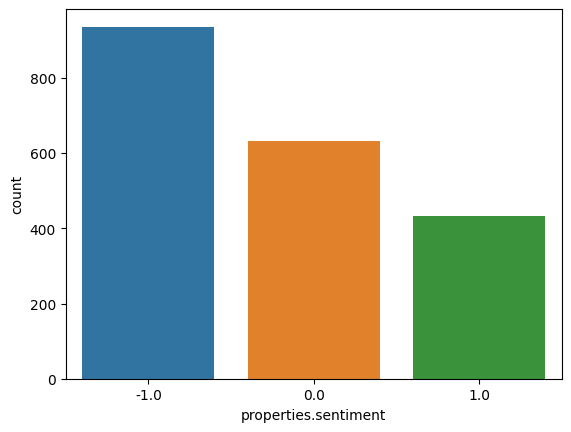

<Figure size 640x480 with 0 Axes>

In [68]:
sns.countplot(x = 'properties.sentiment',data = df)
plt.show()
plt.savefig("image\sentiment.png")

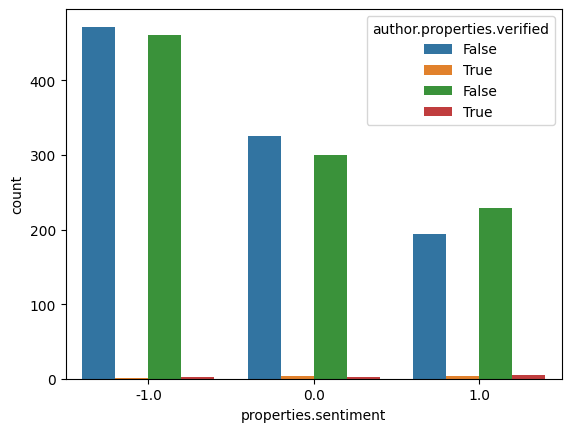

<Figure size 640x480 with 0 Axes>

In [72]:
# count plot properties.sentiment and author.properties.verified
sns.countplot(x='properties.sentiment',hue='author.properties.verified',data=df)
plt.show()
plt.savefig("image\properties.png")

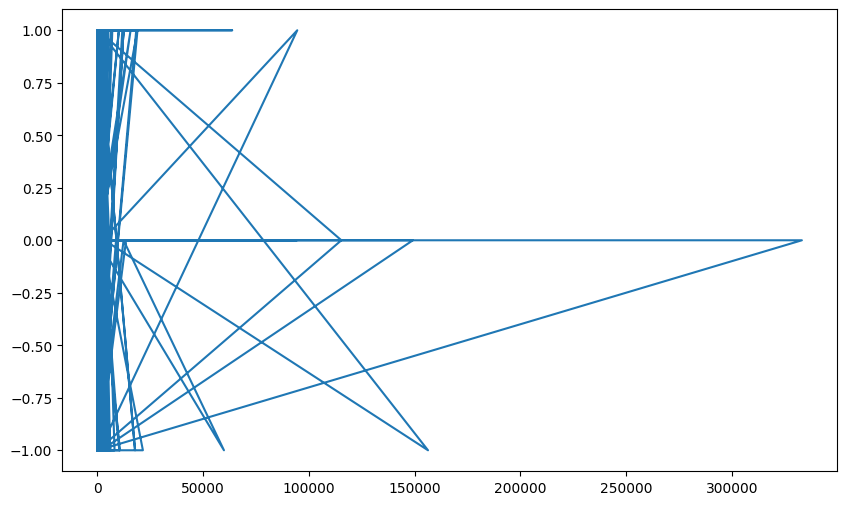

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df["author.properties.friends"], df["properties.sentiment"])
plt.savefig("image/author properties against properties sentiments plot.png")

###  Using input for prediction

In [75]:
df.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,author,location,content,properties
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46,NaN,NaN,NaN,NaN


In [90]:
df["properties"].unique()

array([nan], dtype=object)

In [79]:
df["content.body"].unique()

array(["Can't believe I'm missing Love Island 😩",
       "Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable",
       'How many times does he wonna say the phrase "i deal with shit" #LoveIsland',
       ...,
       'useless computer desk just taking up space in here that I would rather use for my own desk & a bookcase.',
       "@Amyyy14 thank u so much Amy you really get me ❤️ I come home tmrw let's get drinks",
       'Groves on points https://t.co/qHxgz4Fn8f'], dtype=object)

In [83]:
df["properties.sentiment"].unique()

array([ 1., -1.,  0.])

In [121]:
df["location.longitude"].unique()

array([ 0.4571355 , -1.172266  ,  0.026299  , -3.804292  , -2.653238  ,
       -0.130356  , -4.6249165 , -0.8380555 , -4.5314395 , -0.173115  ,
       -1.8906405 , -0.12723   , -0.092633  , -2.8563455 , -1.998     ,
        0.511578  , -2.0877745 , -0.513091  , -0.115406  ,  0.1618535 ,
       -0.1937195 , -0.102162  , -4.8454345 , -3.542993  , -1.0204445 ,
       -0.1923765 , -2.7751315 , -3.2030085 , -1.556472  , -0.0991635 ,
       -0.191723  ,  0.1028418 , -0.0929105 , -1.3867305 , -0.5701175 ,
       -4.5111855 , -2.392945  , -2.298134  ,  0.478479  , -0.010316  ,
       -2.1735065 ,  0.2105895 , -4.3855665 , -1.5685955 , -2.915427  ,
       -1.2225015 , -0.1198244 , -3.945735  , -3.1798    , -0.659424  ,
       -2.304758  ,  0.078863  , -4.200441  , -1.37532   , -4.2417515 ,
       -4.001617  , -2.7743115 , -4.14293   , -1.449612  ,  0.7212505 ,
       -5.667601  , -0.148936  , -0.9207325 ,  0.4827625 , -6.161753  ,
       -0.960897  , -0.882951  , -0.3370625 , -0.252754  , -1.10

### Creating Sample Input

In [91]:
input_data_dict = {
    
    "author.properties.friends": 114,
    "author.properties.status_count": 1377,
    "author.properties.verified": "True",
    "content.body": "Can't believe I'm missing Love Island 😩",
    "location.country": 'GG',
    "properties.platform": 'twitter',
    "properties.sentiment": 1,
    "location.latitude": 52.96974444,
    "location.longitude": -1.172266
    
}

In [92]:
input_data_dict

{'author.properties.friends': 114,
 'author.properties.status_count': 1377,
 'author.properties.verified': 'True',
 'content.body': "Can't believe I'm missing Love Island 😩",
 'location.country': 'GG',
 'properties.platform': 'twitter',
 'properties.sentiment': 1,
 'location.latitude': 52.96974444,
 'location.longitude': -1.172266}

In [93]:
input_data = pd.DataFrame([input_data_dict])

In [94]:
input_data

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,114,1377,True,Can't believe I'm missing Love Island 😩,GG,twitter,1,52.97,-1.17


In [113]:
save_model_predictor.predict(input_data)

0   -1.00
Name: properties.sentiment, dtype: float64

In [115]:
save_model_predictor.predict(input_data)[0]

-1.0